## Ejercicio 1
Queremos cargar una imagen a color cualquiera (png), transformarla a escala de grises
e introducirle ruido sal y pimienta, por ejemplo, usando este código:
import random
def ruido(image, a, b): #a y b son las probabilidades de ocurrir el ruido
pimienta y sal, respectivamente.
aleat = np.random.randint(1,101, size = (image.shape[0], image.shape[1]))
image2 = np.where(aleat <=100*a, 0, image)
out = np.where(aleat > 100-100*b, 255, image2)
return out

a) ¿Qué cantidad aproximada de píxeles de la imagen original se ven modificados
por el ruido introducido? Razónalo.

El ruido sal afecta un porcentaje de píxeles que es el valor de a * 100, y el ruido pimienta afecta un porcentaje de píxeles que es el valor de b * 100.

Por lo tanto, la cantidad de píxeles modificados será aproximadamente:

 píxeles modificados = alto de la imagen × ancho de la imagen × (a+b)

b) **Razona** qué filtro de los vistos en clase es más apropiado para eliminar el ruido
introducido.

Para eliminar el ruido sal y pimienta, el filtro más adecuado es el filtro de mediana. 
Este filtro es muy eficaz para eliminar el ruido impulsivo (sal y pimienta) sin afectar demasiado 
a las áreas de la imagen que contienen detalles importantes.

El filtro de mediana reemplaza cada píxel con la mediana de los píxeles en su vecindad. 
Como los píxeles afectados por el ruido tienen valores muy diferentes a los valores de sus vecinos, 
este filtro puede eliminar eficazmente los valores atípicos sin suavizar demasiado los bordes o detalles.

c) Después, aplícalo para ver que efectivamente es así, comparándolo con otro
filtro distinto de suavizado. Prueba también distintos tamaños de máscaras para
ver cuál funciona mejor.

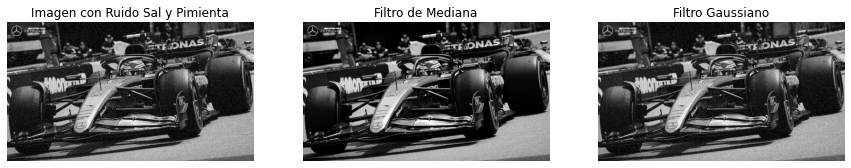

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Intentar cargar la imagen en color
img_color = cv2.imread('../TEMA 2/imagen_2.jpg')

# Verificar si la imagen se cargó correctamente
if img_color is None:
    print("Error: La imagen no se cargó correctamente. Verifica la ruta del archivo.")
else:
    # Transformar a escala de grises
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Función de ruido sal y pimienta
    def ruido(image, a, b):
        aleat = np.random.randint(1, 101, size=(image.shape[0], image.shape[1]))
        image2 = np.where(aleat <= 100 * a, 0, image)
        out = np.where(aleat > 100 - 100 * b, 255, image2)
        return out

    # Introducir ruido sal y pimienta en la imagen
    img_noisy = ruido(img_gray, 0.05, 0.05)

    # Aplicar filtro de mediana
    img_median = cv2.medianBlur(img_noisy, 5)  # Tamaño de la máscara = 5

    # Aplicar filtro gaussiano
    img_gaussian = cv2.GaussianBlur(img_noisy, (5, 5), 0)  # Máscara 5x5

    # Mostrar resultados
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(img_noisy, cmap='gray')
    plt.title('Imagen con Ruido Sal y Pimienta')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_median, cmap='gray')
    plt.title('Filtro de Mediana')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_gaussian, cmap='gray')
    plt.title('Filtro Gaussiano')
    plt.axis('off')

    plt.show()


d) Usa la medida del error denominada Mean Squared Error (error cuadrático medio) para razonar cuál es
el óptimo de los probados anteriormente. ¿Coincide con el que habías escogido como óptimo?

In [13]:
def mse(imageA, imageB):
    # Calcular el error cuadrático medio
    err = np.sum((imageA - imageB) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Calcular MSE entre la imagen original y las imágenes filtradas
mse_median = mse(img_gray, img_median)
mse_gaussian = mse(img_gray, img_gaussian)

print(f'MSE (Mediana): {mse_median}')
print(f'MSE (Gaussiano): {mse_gaussian}')


MSE (Mediana): 18.74640679253472
MSE (Gaussiano): 61.63083685980903


## Ejercicio 2
Carga una imagen en escala de grises de 8 bits.

a) Busca la forma de aplicar un filtro creado por ti mismo a la imagen y averigua
cuáles son las opciones con las que cuentas para el tratamiento del marco
exterior de píxeles de la imagen. ¿Hay una opción por defecto? Haz pruebas.

b) Queremos realzar los detalles de la imagen usando el filtro Laplaciano. Averigua,
consultando la documentación correspondiente, qué máscara está
implementada y cómo está procesando la salida la implementación usada del
Laplaciano, es decir ¿los valores de salida están ajustados a [0,255]? ¿O en qué
rango están? ¿Qué ocurre con los valores negativos del Laplaciano? Según cómo
sean estos valores de salida, razona cómo puedes usar ese Laplaciano pararealzar los detalles claros de la imagen y hazlo, mostrando y evaluando los
resultados tras haber probado con distintos tamaños de máscaras.

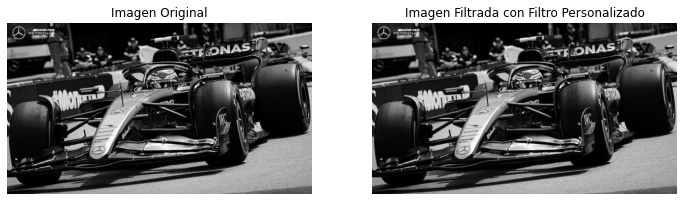

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('../TEMA 2/imagen_2.jpg', cv2.IMREAD_GRAYSCALE)

# Definir una máscara de filtro personalizado de suavizado
mask = np.ones((3, 3), np.float32) / 9  # Filtro promedio 3x3

# Aplicar el filtro usando cv2.filter2D
filtered_img = cv2.filter2D(img, -1, mask, borderType=cv2.BORDER_REPLICATE)

# Mostrar imagen original y filtrada
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title('Imagen Filtrada con Filtro Personalizado')
plt.axis('off')

plt.show()

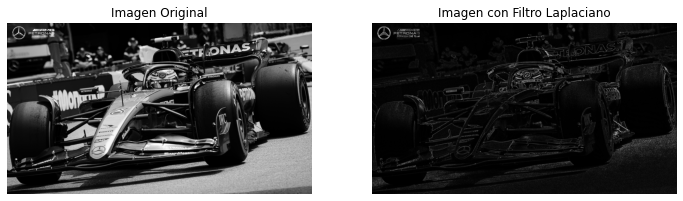

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img = cv2.imread('../TEMA 2/imagen_2.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro Laplaciano usando OpenCV
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Convertir los valores negativos a positivos y ajustar a [0, 255]
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Mostrar la imagen original y la imagen con filtro Laplaciano
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Imagen con Filtro Laplaciano')
plt.axis('off')

plt.show()

los valores de salida no están ajustados a [0, 255] directamente. El filtro Laplaciano genera valores flotantes (positivos y negativos) que no están en el rango estándar de 8 bits [0, 255].

Los valores negativos del filtro Laplaciano indican áreas donde la intensidad de la imagen disminuye. Estos valores negativos no se pueden mostrar directamente en imágenes de 8 bits (que solo aceptan valores de 0 a 255).

Por lo tanto, para visualizar la salida de un filtro Laplaciano en una imagen de 8 bits, es necesario convertir los valores negativos a positivos y luego escalar la imagen resultante para que sus valores estén en el rango de [0, 255].

Para realzar los detalles claros, podemos aplicar el filtro Laplaciano, convertir los valores negativos a positivos y luego ajustar los valores a [0, 255].

La salida de la imagen resultante mostrará los bordes más destacados, ya que el filtro Laplaciano acentúa los detalles de las áreas de alta frecuencia de la imagen.